## This file does some initial data exploration

In [24]:
# Will delete everything in memory- be cautious
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [25]:
import pandas as pd
import numpy as np
import datetime
import os
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data_dir = '../data/'

In [27]:
pl_12_14_dir = data_dir + 'PL 12,14'
pl_17_18_dir = data_dir + 'PL 17,18'
pl_19_24_dir = data_dir + 'PL 19,24'
pl_21_23_dir = data_dir + 'Pl 21,23'

In [28]:
pl_12_14_1 = pd.read_csv(pl_12_14_dir + '/PL12(1).csv')

In [29]:
len(pl_12_14_1)

1257

In [30]:
matlab_datenum = pl_12_14_1['Date_Time'][0]

In [31]:
python_datetime = datetime.datetime.fromordinal(int(matlab_datenum)) + datetime.timedelta(days=matlab_datenum%1) - datetime.timedelta(days = 366)

In [32]:
matlab_datenum

735817.600844907

## Read in the data for cell PL12

In [33]:
# get the list of files in the directory
onlyfiles = [f for f in listdir(pl_12_14_dir) if isfile(join(pl_12_14_dir, f))]

In [34]:
# Empty dictionary to hold all the dataframe for various files
dict_pl12 = {}
for i in range(len(onlyfiles)):
    if 'PL12' in onlyfiles[i]:
        # Extract the filenumber from the name
        file_number = re.search('PL12\((.+?)\).csv', onlyfiles[i]).group(1)
        # Give a value of dataframe to each key
        dict_pl12[int(file_number)] = pd.read_csv(pl_12_14_dir + "/" + onlyfiles[i])

In [35]:
dict_pl12.keys()

dict_keys([1, 10, 11, 12, 13, 14, 15, 16, 17, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
dict_pl12_ordered = {}
# Sort the dictionary based on keys
for key in sorted(dict_pl12.keys()):
    dict_pl12_ordered[key] = dict_pl12[key]

In [37]:
dict_pl12_ordered.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [38]:
# Concatenate the dataframes to create the total dataframe
df_pl12 = pd.concat(dict_pl12_ordered.values())

In [39]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
0,10.000251,735817.600845,1,1,0.0,3.847112,0.0,0.0
1,20.015733,735817.600961,1,1,0.0,3.847112,0.0,0.0
2,30.031305,735817.601076,1,1,0.0,3.846950,0.0,0.0
3,40.031310,735817.601192,1,1,0.0,3.846950,0.0,0.0
4,50.031323,735817.601308,1,1,0.0,3.847112,0.0,0.0


In [40]:
# Convert the Date_Time from matlab datenum to human readable Date_Time
df_pl12['Date_Time_new'] = df_pl12['Date_Time'].apply(lambda x: datetime.datetime.fromordinal(int(x)) + datetime.timedelta(days=x%1) - datetime.timedelta(days = 366)  )

In [41]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
0,10.000251,735817.600845,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:12.999964
1,20.015733,735817.600961,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:22.999980
2,30.031305,735817.601076,1,1,0.0,3.846950,0.0,0.0,2014-08-06 14:25:33.000017
3,40.031310,735817.601192,1,1,0.0,3.846950,0.0,0.0,2014-08-06 14:25:43.000033
4,50.031323,735817.601308,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:52.999968


In [42]:
# Reset the index and drop the old index
df_pl12_indexed = df_pl12.reset_index(drop=True)

In [43]:
df_pl12_indexed.tail()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
1788450,114281.743536,736177.947546,20,5,0.0,4.193922,5.043826,4.909113,2015-08-01 22:44:27.999969
1788451,114291.759208,736177.947662,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:37.999995
1788452,114301.774772,736177.947778,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:48.000022
1788453,114311.790321,736177.947894,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:57.999957
1788454,114319.180876,736177.947975,20,5,0.0,4.194246,5.043826,4.909113,2015-08-01 22:45:05.000000


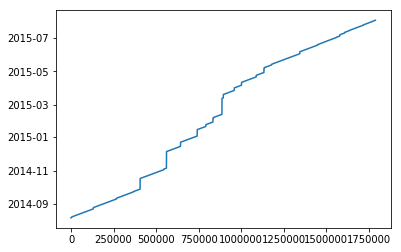

In [44]:
# Draw the plot of time column to make sure that things are arranged in the right order
plt.plot(df_pl12_indexed['Date_Time_new'])

In [45]:
# Describe the dataframe 
df_pl12_indexed.describe()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
count,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06
mean,6.309269e+05,7.360084e+05,1.072928e+01,4.465146e+01,1.328818e-03,4.037308e+00,4.625508e+01,4.595226e+01
std,4.373463e+05,1.184929e+02,2.077323e+00,2.884129e+01,8.780730e-01,2.698253e-01,2.933269e+01,2.904083e+01
min,8.150746e-02,7.358176e+05,1.000000e+00,1.000000e+00,-3.001397e+00,2.748463e+00,0.000000e+00,0.000000e+00
25%,2.788125e+05,7.358942e+05,1.000000e+01,2.000000e+01,0.000000e+00,3.925225e+00,2.134357e+01,2.131180e+01
50%,5.765995e+05,7.360363e+05,1.000000e+01,4.100000e+01,2.905629e-02,4.198621e+00,4.399779e+01,4.355060e+01
75%,9.053943e+05,7.361166e+05,1.200000e+01,6.900000e+01,4.220106e-01,4.200404e+00,6.961473e+01,6.887312e+01
max,2.139564e+06,7.361779e+05,2.000000e+01,1.010000e+02,2.085116e+00,4.247663e+00,1.150644e+02,1.158191e+02


In [48]:
df_sample = df_pl12_indexed.iloc[0:10000, :]


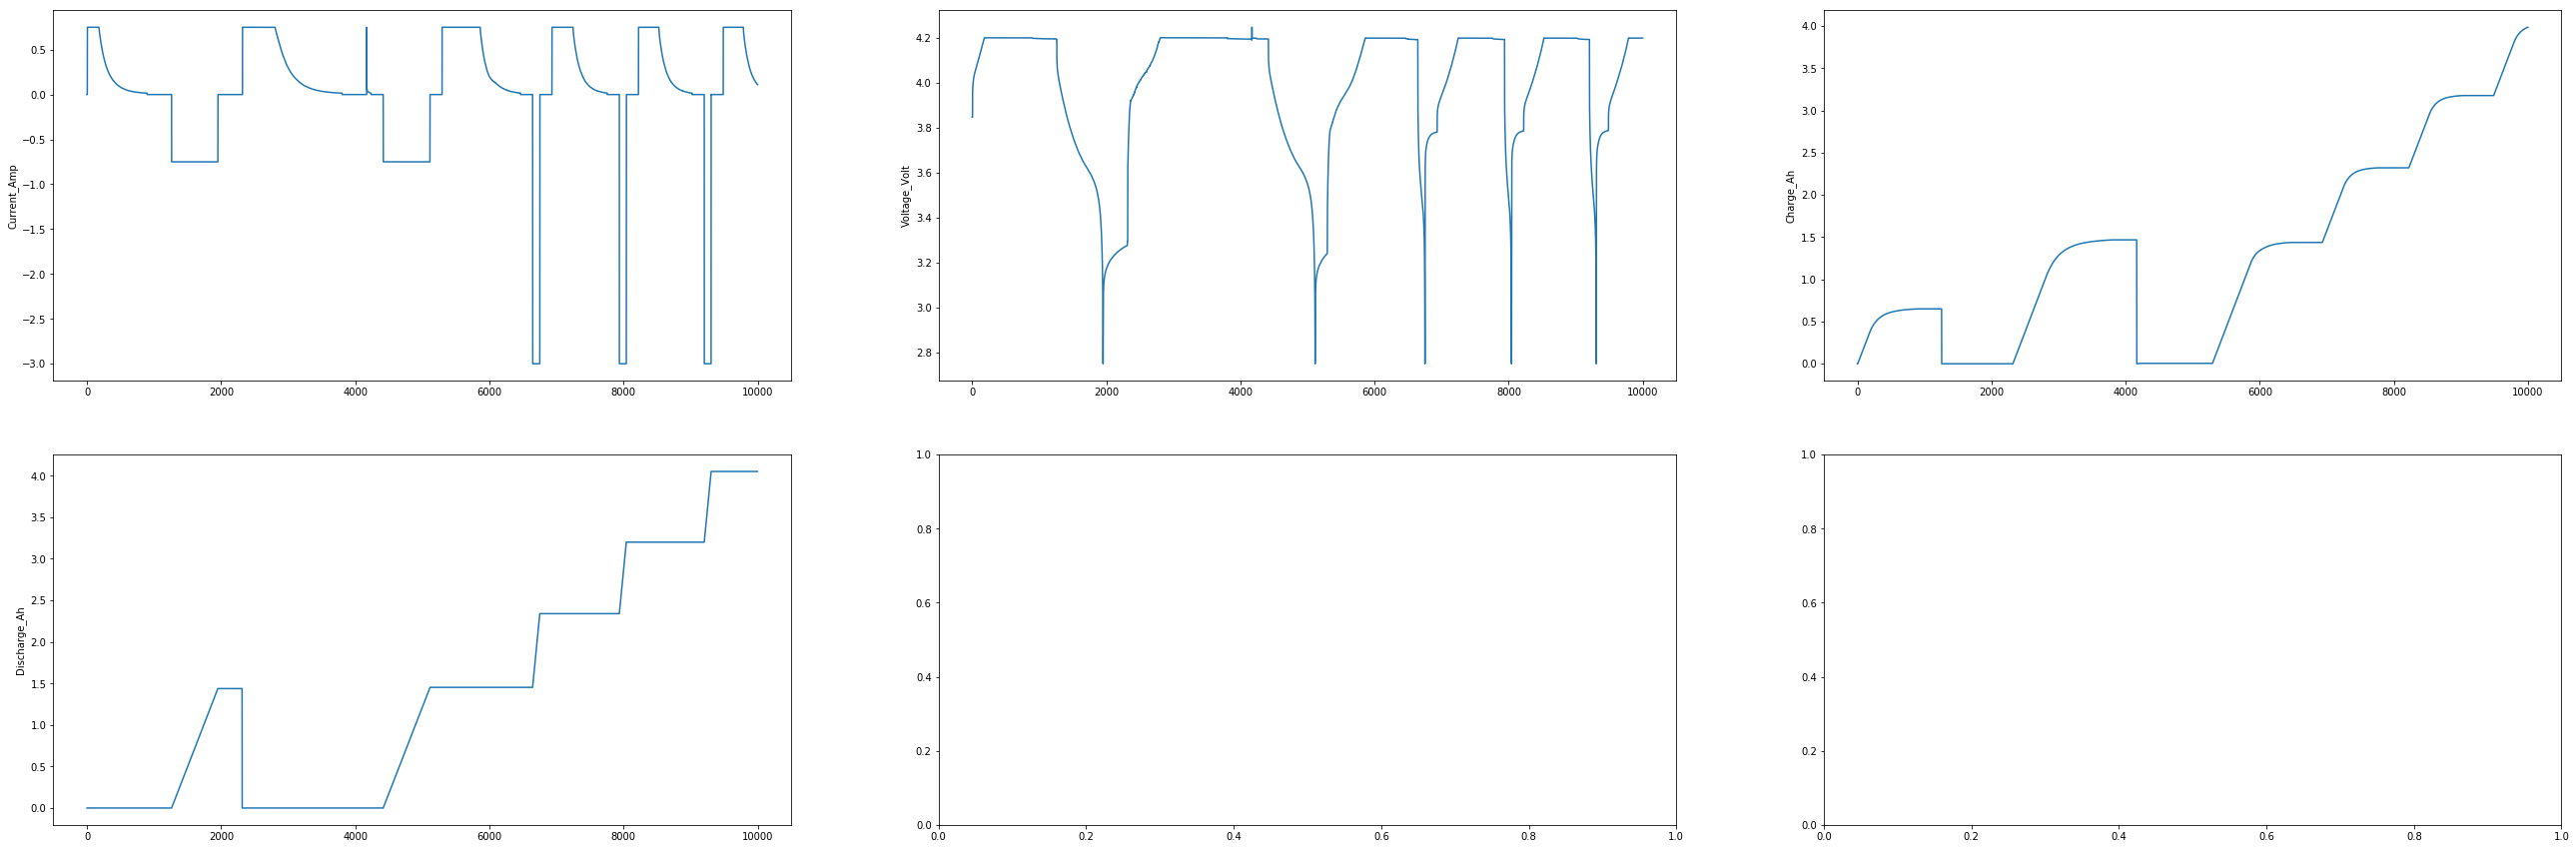

In [49]:
fig, ax = plt.subplots(2, 3, figsize = (45,15))
sns.lineplot(x = df_sample.index, y = df_sample['Current_Amp'], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Voltage_Volt'], ax = ax[0][1])
sns.lineplot(x = df_sample.index, y = df_sample['Charge_Ah'], ax = ax[0][2])
sns.lineplot(x = df_sample.index, y = df_sample['Discharge_Ah'], ax = ax[1][0])

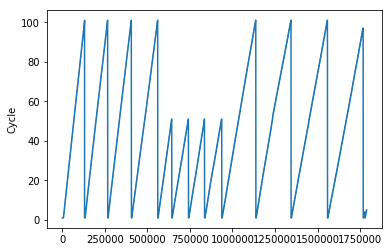

In [50]:
# Plot how the variable 'Cycle' varies in the data - this combined dataframe is basically composed of several disjoint experiments,
# so the cycle count gets reset after every few cycles
#sns.lineplot(x = df_pl12_indexed.index, y = df_pl12_indexed['Cycle'])

In [51]:
# Round the current to get rid of control errors and create a numpy array of 'Current' values
a = np.array(round(df_pl12_indexed['Current_Amp'], 2))

In [52]:
# Find the indices when the current changes sign - this will consider `zero` as a sign change, 
# so -1, has different sign than 0, which is a different sign than 1
idx3=np.where(np.diff(np.sign(a)) != 0)[0] + 1
idx3

array([      6,     896,    1263, ..., 1786354, 1786537, 1788274])

In [53]:
# Create a new empty column to contain the correct cycle count 
df_pl12_indexed['Cycle_new'] = ""

In [54]:
cycle_count = 0
# Give a cycle number for each row, cycle number updating when the sign changes four times 
# i.e. sign starts from zero, to positive, to zero to negative. This is one cycle
for i in range(4, len(idx3), 4):
    cycle_count = cycle_count + 1    
    df_pl12_indexed['Cycle_new'].iloc[idx3[i-4]:idx3[i]] = cycle_count

/home/ubuntu_cp/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
# First few rows with zero current be just cycle 0
df_pl12_indexed['Cycle_new'].iloc[0:idx3[0]] = 0

In [76]:
# Assign the last cycle number to last few rest rows - that is the steps not covered by full cycles before 
df_pl12_indexed['Cycle_new'].iloc[idx3[-(len(idx3) % 4)]:len(df_pl12_indexed)] = df_pl12_indexed['Cycle_new'].iloc[idx3[-(len(idx3) % 4)] - 1]

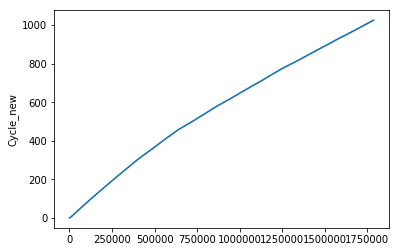

In [79]:
# Get the plot of 'Cycle_new' to see if this is right 
#sns.lineplot(x = df_pl12_indexed.index, y = df_pl12_indexed['Cycle_new'])

In [80]:
# Group the data by cycle number 
df_pl12_indexed_grouped = df_pl12_indexed.groupby(['Cycle_new']).count()

In [81]:
cycles = df_pl12_indexed_grouped.index

In [82]:
cycles

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025],
           dtype='int64', name='Cycle_new', length=1026)

In [95]:
df_pl12_indexed['Charge_cycle_Ah'] = df_pl12_indexed['Charge_Ah']

for i in range(4, 20): #len(cycles)):
    cur_indices = df_pl12_indexed.index[df_pl12_indexed['Cycle_new'] == cycles[i]]
    prev_indices = df_pl12_indexed.index[df_pl12_indexed['Cycle_new'] == cycles[i-1]]
    prev_max = max(df_pl12_indexed['Charge_Ah'].iloc[prev_indices])
    # Correct the charge capacity during the cycle - instead of cumulativ, let this column be capacity transferred during the cycle
    df_pl12_indexed['Charge_cycle_Ah'].iloc[cur_indices] = df_pl12_indexed['Charge_Ah'].iloc[cur_indices] - prev_max
    

In [105]:
df_pl12_indexed['Discharge_cycle_Ah'] = df_pl12_indexed['Discharge_Ah']
for i in range(3, 20): #len(cycles)):
    cur_indices = df_pl12_indexed.index[df_pl12_indexed['Cycle_new'] == cycles[i]]
    prev_indices = df_pl12_indexed.index[df_pl12_indexed['Cycle_new'] == cycles[i-1]]
    prev_max_dis = max(df_pl12_indexed['Discharge_Ah'].iloc[prev_indices])
    df_pl12_indexed['Discharge_cycle_Ah'].iloc[cur_indices] = df_pl12_indexed['Discharge_Ah'].iloc[cur_indices] - prev_max_dis

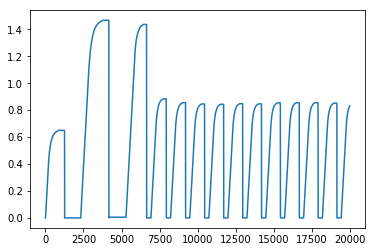

In [106]:
plt.plot(df_pl12_indexed['Charge_cycle_Ah'].iloc[0:20000])

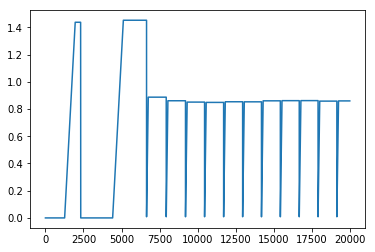

In [107]:
plt.plot(df_pl12_indexed['Discharge_cycle_Ah'].iloc[0:20000])

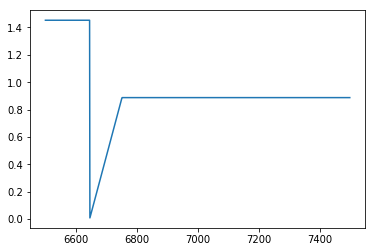

In [112]:
plt.plot(df_pl12_indexed['Discharge_cycle_Ah'].iloc[6500:7500])

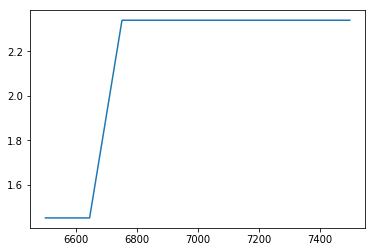

In [111]:
plt.plot(df_pl12_indexed['Discharge_Ah'].iloc[6500:7500])

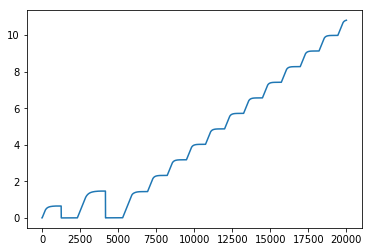

In [98]:
plt.plot(df_pl12_indexed['Charge_Ah'].iloc[0:20000])

In [ ]:
df_pl12_indexed['Capacity_Ah'] = df_pl12_indexed['Charge_Ah'] - df_pl12_indexed['Discharge_Ah']

In [ ]:
plt.plot(df_pl12_indexed['Ch_Ah'].iloc[0:100000])

In [ ]:
df_pl12_indexed['Charge_cycle_Ah'].iloc[0:10]

In [115]:
df_pl12_indexed.iloc[6630:6700, :]

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new,Cycle_new,Charge_cycle_Ah,Disharge_cycle_Ah,Discharge_cycle_Ah
6630,24608.911956,735819.706713,12,1,0.000000,4.192641,1.436431,1.452497,2014-08-08 16:57:39.999998,3,1.436431,1.452497,1.452497
6631,24618.911975,735819.706829,12,1,0.000000,4.192641,1.436431,1.452497,2014-08-08 16:57:50.000035,3,1.436431,1.452497,1.452497
6632,24628.912083,735819.706944,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:57:59.999970,3,1.436431,1.452497,1.452497
6633,24638.927434,735819.707060,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:58:09.999986,3,1.436431,1.452497,1.452497
6634,24648.943297,735819.707176,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:58:20.000003,3,1.436431,1.452497,1.452497
6635,24658.958628,735819.707292,12,1,0.000000,4.192641,1.436431,1.452497,2014-08-08 16:58:30.000029,3,1.436431,1.452497,1.452497
6636,24668.974575,735819.707407,12,1,0.000000,4.192317,1.436431,1.452497,2014-08-08 16:58:39.999965,3,1.436431,1.452497,1.452497
6637,24678.989842,735819.707523,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:58:49.999981,3,1.436431,1.452497,1.452497
6638,24689.005716,735819.707639,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:59:00.000017,3,1.436431,1.452497,1.452497
6639,24699.021115,735819.707755,12,1,0.000000,4.192480,1.436431,1.452497,2014-08-08 16:59:10.000033,3,1.436431,1.452497,1.452497
